### Python module/package imports for this chapter

In [1]:
import math, json, collections, itertools

In [2]:
import numpy as np
import matplotlib.pyplot as pp
%matplotlib inline

In [3]:
from mpl_toolkits.basemap import Basemap
import geopy

## Mastering Python loops

In [4]:
for n in [1,1,2,3,5,8,13,21,34,55]:
    print(n)

1
1
2
3
5
8
13
21
34
55


In [5]:
for l in "Fibonacci":
    print(l)

F
i
b
o
n
a
c
c
i


In [7]:
it = iter("Fib")
print(it.__next__())
print(it.__next__())
print(it.__next__())
print(it.__next__())

F
i
b


StopIteration: 

In [8]:
for game in open('games.txt','r'):
    print(game,end='')

Athens (1896)
Paris (1900)
St Louis (1904)
London (1908)
Stockholm (1912)
Antwerp (1920)
Paris (1924)
Amsterdam (1928)
Los Angeles (1932)
Berlin (1936)
London (1948)
Helsinki (1952)
Melbourne / Stockholm (1956)
Rome (1960)
Tokyo (1964)
Mexico (1968)
Munich (1972)
Montreal (1976)
Moscow (1980)
Los Angeles (1984)
Seoul (1988)
Barcelona (1992)
Atlanta (1996)
Sydney (2000)
Athens (2004)
Beijing (2008)
London (2012)
Rio (2016)


In [9]:
for game in open('games.txt','r'):
    city = game.split()[0]
    year = game.split()[1]
    
    print(city,year)

Athens (1896)
Paris (1900)
St Louis
London (1908)
Stockholm (1912)
Antwerp (1920)
Paris (1924)
Amsterdam (1928)
Los Angeles
Berlin (1936)
London (1948)
Helsinki (1952)
Melbourne /
Rome (1960)
Tokyo (1964)
Mexico (1968)
Munich (1972)
Montreal (1976)
Moscow (1980)
Los Angeles
Seoul (1988)
Barcelona (1992)
Atlanta (1996)
Sydney (2000)
Athens (2004)
Beijing (2008)
London (2012)
Rio (2016)


In [10]:
for game in open('games.txt','r'):
    words = game.split()
    
    city = ' '.join(words[:-1])
    year = words[-1].strip('()')
    
    print(city,year)

Athens 1896
Paris 1900
St Louis 1904
London 1908
Stockholm 1912
Antwerp 1920
Paris 1924
Amsterdam 1928
Los Angeles 1932
Berlin 1936
London 1948
Helsinki 1952
Melbourne / Stockholm 1956
Rome 1960
Tokyo 1964
Mexico 1968
Munich 1972
Montreal 1976
Moscow 1980
Los Angeles 1984
Seoul 1988
Barcelona 1992
Atlanta 1996
Sydney 2000
Athens 2004
Beijing 2008
London 2012
Rio 2016


In [11]:
cities, years = [], []

for game in open('games.txt','r'):
    words = game.split()
    
    city = ' '.join(words[:-1])
    year = words[-1].strip('()')
    
    cities.append(city)
    years.append(year)

In [12]:
geolocator = geopy.geocoders.Nominatim()

locations = {}
for city in cities:
    print("Locating",city)
    locations[city] = geolocator.geocode(city.split('/')[0])

Locating Athens
Locating Paris
Locating St Louis
Locating London
Locating Stockholm
Locating Antwerp
Locating Paris
Locating Amsterdam
Locating Los Angeles
Locating Berlin
Locating London
Locating Helsinki
Locating Melbourne / Stockholm
Locating Rome
Locating Tokyo
Locating Mexico
Locating Munich
Locating Montreal
Locating Moscow
Locating Los Angeles
Locating Seoul
Locating Barcelona
Locating Atlanta
Locating Sydney
Locating Athens
Locating Beijing
Locating London
Locating Rio


In [13]:
locations["Paris"]

Location(Paris, Île-de-France, France, (48.8566101, 2.3514992, 0.0))

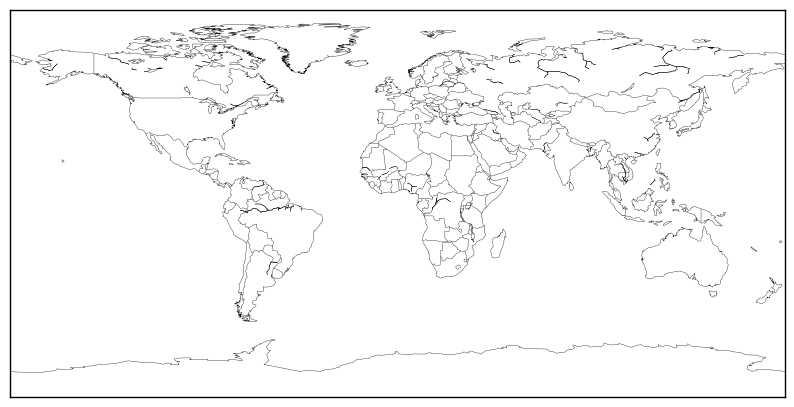

In [14]:
pp.figure(figsize=(10,5))

world = Basemap()
world.drawcoastlines(linewidth=0.25)
world.drawcountries(linewidth=0.25)

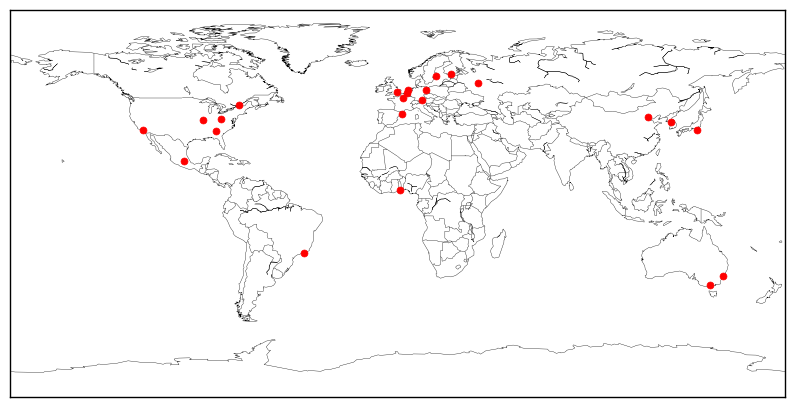

In [15]:
pp.figure(figsize=(10,5))

world = Basemap()
world.drawcoastlines(linewidth=0.25)
world.drawcountries(linewidth=0.25)

for city,pos in locations.items():
    world.plot(pos.longitude,pos.latitude,'r.',markersize=10,latlon=True)

In [16]:
locations

{'Amsterdam': Location(Amsterdam, Centrum, Amsterdam, MRA, Stadsregio Amsterdam, Noord-Holland, Nederland, (52.3745403, 4.89797550561798, 0.0)),
 'Antwerp': Location(Antwerpen, Vlaanderen, België - Belgique - Belgien, (51.2211097, 4.3997081, 0.0)),
 'Athens': Location(Athens, Athens County, Ohio, United States of America, (39.3292396, -82.1012554, 0.0)),
 'Atlanta': Location(Atlanta, Fulton County, Georgia, United States of America, (33.7490987, -84.3901848, 0.0)),
 'Barcelona': Location(Barcelona, BCN, CAT, España, (41.3825596, 2.1771353, 0.0)),
 'Beijing': Location(北京市, 东城区, 北京市, 100010, 中国, (39.9059631, 116.391248, 0.0)),
 'Berlin': Location(Berlin, Deutschland, (52.5170365, 13.3888599, 0.0)),
 'Helsinki': Location(Helsinki, Helsingin seutukunta, Uusimaa, Etelä-Suomi, Suomi, (60.1674086, 24.9425683, 0.0)),
 'London': Location(London, Greater London, England, UK, (51.5073219, -0.1276473, 0.0)),
 'Los Angeles': Location(LA, Los Angeles County, California, United States of America, (34

In [17]:
locations['Rome'] = geolocator.geocode('Rome, Italy')

In [18]:
locations['Rome']

Location(RM, LAZ, Italia, (41.85233365, 12.6308541512038, 0.0))

In [19]:
locations['Athens'] = geolocator.geocode('Athens, Greece')

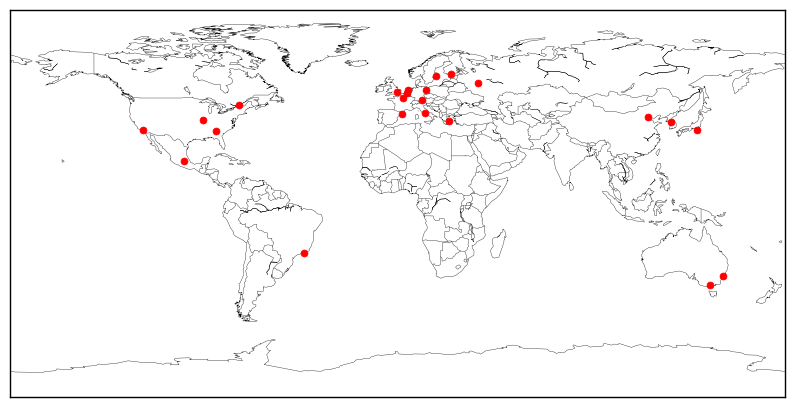

In [20]:
pp.figure(figsize=(10,5))

world = Basemap()
world.drawcoastlines(linewidth=0.25)
world.drawcountries(linewidth=0.25)

for city,pos in locations.items():
    world.plot(pos.longitude,pos.latitude,'r.',markersize=10,latlon=True)

In [21]:
for i,city in enumerate(cities[:10]):
    print(i,city)

0 Athens
1 Paris
2 St Louis
3 London
4 Stockholm
5 Antwerp
6 Paris
7 Amsterdam
8 Los Angeles
9 Berlin


In [22]:
for city in sorted(cities[:10]):
    print(city)

Amsterdam
Antwerp
Athens
Berlin
London
Los Angeles
Paris
Paris
St Louis
Stockholm


In [23]:
for city in sorted(cities[:10],key=len):
    print(city)

Paris
Paris
Athens
London
Berlin
Antwerp
St Louis
Stockholm
Amsterdam
Los Angeles


In [24]:
for i,city in enumerate(reversed(cities[:10])):
    print(i,city)

0 Berlin
1 Los Angeles
2 Amsterdam
3 Paris
4 Antwerp
5 Stockholm
6 London
7 St Louis
8 Paris
9 Athens


In [25]:
for year,city in zip(years[:10],cities):
    print(year,city)

1896 Athens
1900 Paris
1904 St Louis
1908 London
1912 Stockholm
1920 Antwerp
1924 Paris
1928 Amsterdam
1932 Los Angeles
1936 Berlin
